## Import libraries

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

## Load and preprocess data 

In [131]:
df = pd.read_csv('./19drivers_eco_score.csv')

In [132]:
# assign driving style for every index in driving data according to the following metric

'''
@ ECO_DRIVING_SCORE

Saver -> 60 - 100
Normal -> 40 - 59
Aggresive -> 0 - 39

'''

df['STYLE'] = 0

for i in range(0, len(df)):
    if df['ECO_DRIVING_SCORE'].values[i] >= 60:
        df['STYLE'].values[i] = 0
    elif df['ECO_DRIVING_SCORE'].values[i] < 60 and df['ECO_DRIVING_SCORE'].values[i] >= 40:
        df['STYLE'].values[i] = 1
    else:
        df['STYLE'].values[i] = 2

In [133]:
df_10km = df.loc[df['DISTANCE_SO_FAR'] <= 10]

In [134]:
# split data for different cars

s1 = df_10km.loc[df['VEHICLE_ID'] == 's1']
s2 = df_10km.loc[df['VEHICLE_ID'] == 's2']
s3 = df_10km.loc[df['VEHICLE_ID'] == 's3']
s4 = df_10km.loc[df['VEHICLE_ID'] == 's4']
s5 = df_10km.loc[df['VEHICLE_ID'] == 's5']
s6 = df_10km.loc[df['VEHICLE_ID'] == 's6']
s7 = df_10km.loc[df['VEHICLE_ID'] == 's7']
s8 = df_10km.loc[df['VEHICLE_ID'] == 's8']
s9 = df_10km.loc[df['VEHICLE_ID'] == 's9']
s10 = df_10km.loc[df['VEHICLE_ID'] == 's10']
s11 = df_10km.loc[df['VEHICLE_ID'] == 's11']
s12 = df_10km.loc[df['VEHICLE_ID'] == 's12']
s13 = df_10km.loc[df['VEHICLE_ID'] == 's13']
s14 = df_10km.loc[df['VEHICLE_ID'] == 's14']
s15 = df_10km.loc[df['VEHICLE_ID'] == 's15']
s16 = df_10km.loc[df['VEHICLE_ID'] == 's16']
s17 = df_10km.loc[df['VEHICLE_ID'] == 's17']
s18 = df_10km.loc[df['VEHICLE_ID'] == 's18']
s19 = df_10km.loc[df['VEHICLE_ID'] == 's19']

car_list = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19]

## Modelling and visualization

### Eco-driving score

In [135]:
# plot the driving styles according to the default metric

def show_default_style(car_id):
    style0 = car_id.loc[car_id['STYLE'] == 0]
    style1 = car_id.loc[car_id['STYLE'] == 1]
    style2 = car_id.loc[car_id['STYLE'] == 2]

    plt.figure(figsize=(10,6))
    plt.xlabel('DISTANCE_SO_FAR (KM)')
    plt.ylabel('FUEL_CONSUMPTION (L/KM)')
    plt.scatter(
        style0['DISTANCE_SO_FAR'], style0['FUEL_CONSUMPTION'],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='saving'
    )

    plt.scatter(
        style1['DISTANCE_SO_FAR'], style1['FUEL_CONSUMPTION'],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='normal'
    )

    plt.scatter(
        style2['DISTANCE_SO_FAR'], style2['FUEL_CONSUMPTION'],
        s=50, c='lightblue',
        marker='v', edgecolor='black',
        label='aggresive'
    )

    plt.legend(scatterpoints=1)
    plt.grid()

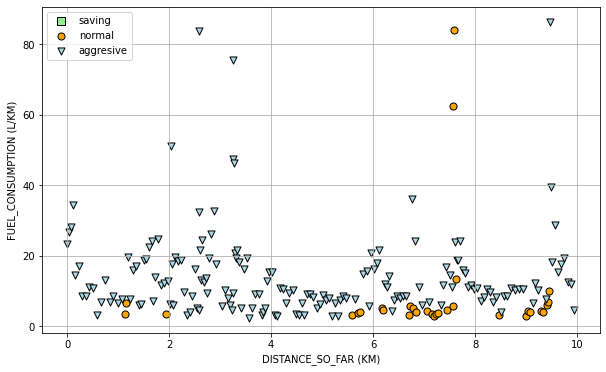

In [136]:
show_default_style(s4)

### K-means

In [137]:
# normalize train data
from sklearn.preprocessing import MinMaxScaler

# K means
def plot_clusters_kmeans(car_id):

    features = ['FUEL_CONSUMPTION', 'MAF',  'SPEED', 'FUEL_RATE', 'ENGINE_LOAD', 'ENGINE_RPM', 'THROTTLE_POS', 'INTAKE_MANIFOLD_PRESSURE',
                'ACCELERATION', 'CAR_JERK', 'MODIFIED_RPM', 'MODIFIED_SPEED', 'SPEED_RPM_RATIO', 
                'FUEL_EFFICIENCY', 'THROTTLE_EFFICIENCY', 'ECO_DRIVING_SCORE',
                'RELATIVE_THROTTLE_SCORE', 'RELATIVE_FUEL_EFFICIENCY_SCORE', 'RELATIVE_ECO_DRIVING_SCORE']

    car_data = car_id
    norm = MinMaxScaler().fit(car_data[features])
    X = norm.transform(car_data[features])

    km = KMeans(n_clusters=3, random_state=42)

    y_km = km.fit_predict(X)

    mean_list = [(car_data[y_km == 0]['FUEL_CONSUMPTION'].values.mean(), 0),
            (car_data[y_km == 1]['FUEL_CONSUMPTION'].values.mean(), 1),
            (car_data[y_km == 2]['FUEL_CONSUMPTION'].values.mean(), 2)]
    print(mean_list)

    saving = min(mean_list)[1]
    mean_list.remove(min(mean_list))
    normal = min(mean_list)[1]
    aggresive = max(mean_list)[1]

    label0 = car_data[y_km == saving]
    label1 = car_data[y_km == normal]
    label2 = car_data[y_km == aggresive]

    plt.figure(figsize=(10,6))
    plt.xlabel('DISTANCE_SO_FAR (KM)')
    plt.ylabel('FUEL_CONSUMPTION (L/KM)')
    plt.scatter(
        label0['DISTANCE_SO_FAR'], label0['FUEL_CONSUMPTION'],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='saving'
    )

    plt.scatter(
        label1['DISTANCE_SO_FAR'], label1['FUEL_CONSUMPTION'],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='normal'
    )

    plt.scatter(
        label2['DISTANCE_SO_FAR'], label2['FUEL_CONSUMPTION'],
        s=50, c='lightblue',
        marker='v', edgecolor='black',
        label='aggresive'
    )

    plt.legend(scatterpoints=1)
    plt.grid()
    plt.title('K Means')

[(5.58123388891619, 0), (17.868107043273298, 1), (15.259248123443548, 2)]


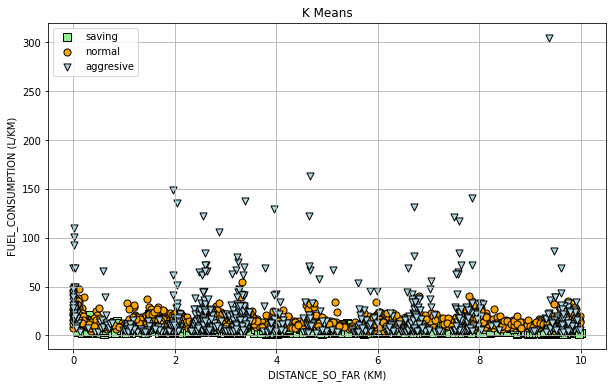

In [138]:
plot_clusters_kmeans(df_10km)

[(40.61291199738565, 0), (14.05473279588516, 1), (5.5791911224778, 2)]


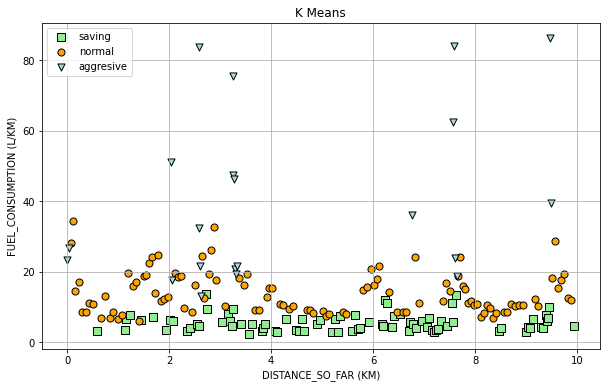

In [139]:
plot_clusters_kmeans(s4)

### HAC

In [141]:
# just a casual attempt :D
# HAC

def plot_clusters_hac(car_id, linkage):

    features = ['FUEL_CONSUMPTION', 'MAF',  'SPEED', 'FUEL_RATE', 'ENGINE_LOAD', 'ENGINE_RPM', 'THROTTLE_POS', 'INTAKE_MANIFOLD_PRESSURE',
                'ACCELERATION', 'CAR_JERK', 'MODIFIED_RPM', 'MODIFIED_SPEED', 'SPEED_RPM_RATIO', 
                'FUEL_EFFICIENCY', 'THROTTLE_EFFICIENCY', 'ECO_DRIVING_SCORE',
                'RELATIVE_THROTTLE_SCORE', 'RELATIVE_FUEL_EFFICIENCY_SCORE', 'RELATIVE_ECO_DRIVING_SCORE']
    car_data = car_id
    # norm = MinMaxScaler().fit(car_data[features[2:]])
    # X = norm.transform(car_data[features[2:]])
    X = car_data[features]

    km = AgglomerativeClustering(n_clusters=3, linkage=linkage)

    y_km = km.fit_predict(X)
    # print(metrics.adjusted_rand_score(y_km, car_id['STYLE']))
    # print(metrics.fowlkes_mallows_score(y_km, car_id['STYLE']))

    mean_list = [(car_data[y_km == 0]['FUEL_CONSUMPTION'].values.mean(), 0),
            (car_data[y_km == 1]['FUEL_CONSUMPTION'].values.mean(), 1),
            (car_data[y_km == 2]['FUEL_CONSUMPTION'].values.mean(), 2)]
    print(mean_list)

    saving = min(mean_list)[1]
    mean_list.remove(min(mean_list))
    normal = min(mean_list)[1]
    aggresive = max(mean_list)[1]


    label0 = car_data[y_km == saving]
    label1 = car_data[y_km == normal]
    label2 = car_data[y_km == aggresive]

    plt.figure(figsize=(10,6))
    plt.xlabel('DISTANCE_SO_FAR')
    plt.ylabel('FUEL_CONSUMPTION')
    plt.scatter(
        label0['DISTANCE_SO_FAR'], label0['FUEL_CONSUMPTION'],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='saving'
    )

    plt.scatter(
        label1['DISTANCE_SO_FAR'], label1['FUEL_CONSUMPTION'],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='normal'
    )

    plt.scatter(
        label2['DISTANCE_SO_FAR'], label2['FUEL_CONSUMPTION'],
        s=50, c='lightblue',
        marker='v', edgecolor='black',
        label='aggresive'
    )

    plt.legend(scatterpoints=1)
    plt.grid()
    plt.title('HAC {}'.format(linkage))

[(12.018520881880377, 0), (22.555253880307614, 1), (9.698373784216795, 2)]


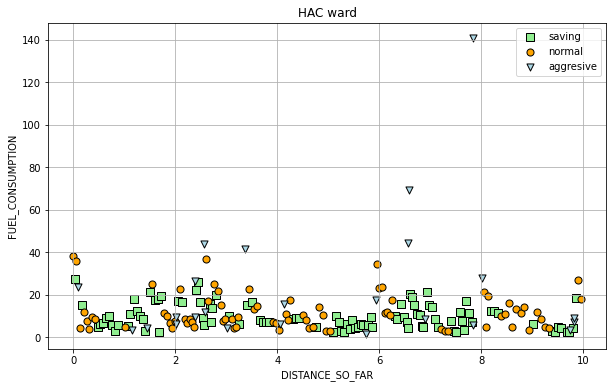

In [142]:
plot_clusters_hac(s2, 'ward')

[(9.153010607656988, 0), (9.15623829910289, 1), (11.1624305303741, 2)]


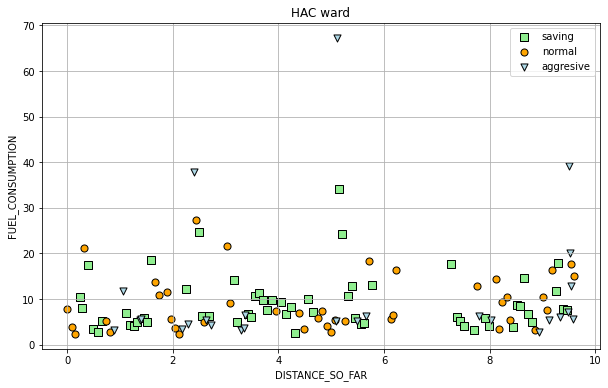

In [143]:
plot_clusters_hac(s9, 'ward')

## Accumulated driving performance analysis

In [144]:
def get_trip_fuel_efficiency(car_id):
    car_id['TRIP_FUEL_EFFICIENCY'] = car_id['FUEL_EFFICIENCY'].mean() 

def get_trip_tps_efficiency(car_id):
    car_id['TRIP_THROTTLE_EFFICIENCY'] = car_id['THROTTLE_EFFICIENCY'].mean() 

In [145]:
# add trip performances to lists

mean_fuel_efficiency_list = []
mean_throttle_list = []

for car in car_list:
    get_trip_fuel_efficiency(car)
    get_trip_tps_efficiency(car)
    mean_fuel_efficiency_list.append(car['TRIP_FUEL_EFFICIENCY'].values[0])
    mean_throttle_list.append(car['TRIP_THROTTLE_EFFICIENCY'].values[0])

C:\Users\night\AppData\Local\Temp/ipykernel_16596/4148535073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_id['TRIP_FUEL_EFFICIENCY'] = car_id['FUEL_EFFICIENCY'].mean()
C:\Users\night\AppData\Local\Temp/ipykernel_16596/4148535073.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_id['TRIP_THROTTLE_EFFICIENCY'] = car_id['THROTTLE_EFFICIENCY'].mean()


In [146]:
MAX_TRIP_FUEL_EFFICIENCY = max(mean_fuel_efficiency_list)
MAX_TRIP_THROTTLE_EFFICIENCY = max(mean_throttle_list)
GASOLINE_PRICE = 2.173 #EUR/L

trip_eco_score_dict = {}

for car in car_list:
    trip_fuel_efficiency_score = car['TRIP_FUEL_EFFICIENCY'].values[0] / MAX_TRIP_FUEL_EFFICIENCY * 100
    trip_throttle_score = car['TRIP_THROTTLE_EFFICIENCY'].values[0]
    trip_eco_driving_score = trip_fuel_efficiency_score * 0.75 + trip_throttle_score * 0.25
    trip_eco_score_dict.update({car['VEHICLE_ID'].values[0] : [trip_fuel_efficiency_score, trip_throttle_score, trip_eco_driving_score]})


def show_trip_eco_score(car_id):

    print('{} trip fuel efficiency score: {}'.format(car_id['VEHICLE_ID'].values[0], trip_eco_score_dict[car_id['VEHICLE_ID'].values[0]][0]))
    print('{} trip throttle score: {}'.format(car_id['VEHICLE_ID'].values[0], trip_eco_score_dict[car_id['VEHICLE_ID'].values[0]][1]))
    print('{} trip eco-driving score: {}'.format(car_id['VEHICLE_ID'].values[0], trip_eco_score_dict[car_id['VEHICLE_ID'].values[0]][2]))

def get_trip_eco_score(car_id):
    return trip_eco_score_dict[car_id['VEHICLE_ID'].values[0]][2]

def get_relative_trip_eco_score(car_id):
    MAX_ECO_DRIVING_SCORE = max(trip_eco_score_dict.values())[2]
    score = get_trip_eco_score(car_id) / MAX_ECO_DRIVING_SCORE * 100
    return score

In [147]:
MAX_ECO_DRIVING_SCORE = max(trip_eco_score_dict.values())[2]
print(MAX_ECO_DRIVING_SCORE)

93.30151869158878


In [148]:
show_trip_eco_score(s4)

s4 trip fuel efficiency score: 71.78385507801674
s4 trip throttle score: 70.19268292682928
s4 trip eco-driving score: 71.38606204021987


### Feedback on trip cost

In [149]:
def show_cost_performance(car_id):
    this_car = car_id['FUEL_CONSUMPTION_SO_FAR'].values[-1] * GASOLINE_PRICE
    for car in car_list:
        if max(trip_eco_score_dict) == car['VEHICLE_ID'].values[0]:
            best_car = car['FUEL_CONSUMPTION_SO_FAR'].values[-1] * GASOLINE_PRICE
    print('Your trip cost is %.2f Euros' %this_car)
    print('The best trip cost is {:.2f} Euros'.format(best_car))
    print('Your trip spent {:.2f} more Euros than the best saver'.format(abs(best_car - this_car)))

In [150]:
show_cost_performance(s4)

Your trip cost is 2.39 Euros
The best trip cost is 2.07 Euros
Your trip spent 0.32 more Euros than the best saver


### trip clustering and classification based on trip Eco score 

In [151]:

trip_data = pd.DataFrame({
    'VEHICLE_ID' : [],
    'FUEL_CONSUMPTION' : [],
    'MAF' : [],
    'SPEED' : [], 
    'FUEL_RATE' : [], 
    'ENGINE_LOAD' : [], 
    'ENGINE_RPM' : [], 
    'THROTTLE_POS' : [], 
    'INTAKE_MANIFOLD_PRESSURE' : [],
    'ACCELERATION' : [], 
    'CAR_JERK' : [],
    'MODIFIED_RPM' : [],
    'MODIFIED_SPEED' : [], 
    'SPEED_RPM_RATIO' : [], 
    'FUEL_EFFICIENCY' : [], 
    'THROTTLE_EFFICIENCY' : [],
    'RELATIVE_THROTTLE_SCORE' : [], 
    'RELATIVE_FUEL_EFFICIENCY_SCORE' : [], 
    'ECO_DRIVING_SCORE' : [],
    'RELATIVE_ECO_DRIVING_SCORE' : []
})

def get_means(car_id):
    means = []
    means.append(car_id['VEHICLE_ID'].values[0])
    means.append(car_id['FUEL_CONSUMPTION'].values.mean())
    means.append(car_id['MAF'].values.mean())
    means.append(car_id['SPEED'].values.mean())
    means.append(car_id['FUEL_RATE'].values.mean())
    means.append(car_id['ENGINE_LOAD'].values.mean())
    means.append(car_id['ENGINE_RPM'].values.mean())
    means.append(car_id['THROTTLE_POS'].values.mean())
    means.append(car_id['INTAKE_MANIFOLD_PRESSURE'].values.mean())
    means.append(car_id['ACCELERATION'].values.mean())
    means.append(car_id['CAR_JERK'].values.mean())
    means.append(car_id['MODIFIED_RPM'].values.mean())
    means.append(car_id['MODIFIED_SPEED'].values.mean())
    means.append(car_id['SPEED_RPM_RATIO'].values.mean())
    means.append(car_id['FUEL_EFFICIENCY'].values.mean())
    means.append(car_id['THROTTLE_EFFICIENCY'].values.mean())
    means.append(car_id['RELATIVE_THROTTLE_SCORE'].values.mean())
    means.append(car_id['RELATIVE_FUEL_EFFICIENCY_SCORE'].values.mean())
    means.append(car_id['ECO_DRIVING_SCORE'].values.mean())
    means.append(car_id['RELATIVE_ECO_DRIVING_SCORE'].values.mean())
    # means.append(get_trip_eco_score(car_id))
    # means.append(get_relative_trip_eco_score(car_id))
    trip_data.loc[len(trip_data.index)] = means

In [152]:
for car in car_list:
    get_means(car)

In [153]:
# assign driving style for every index in driving data according to the following metric

'''
@ ECO_DRIVING_SCORE

Saver -> 60 - 100
Normal -> 40 - 59
Aggresive -> 0 - 39

'''

trip_data['STYLE'] = 0

for i in range(0, len(trip_data)):
    if trip_data['ECO_DRIVING_SCORE'].values[i] >= 60:
        trip_data['STYLE'].values[i] = 0
    elif trip_data['ECO_DRIVING_SCORE'].values[i] < 60 and trip_data['ECO_DRIVING_SCORE'].values[i] >= 40:
        trip_data['STYLE'].values[i] = 1
    else:
        trip_data['STYLE'].values[i] = 2

In [154]:
# plot the driving styles according to the default metric

def show_default_style_trip(car_id):
    style0 = trip_data.loc[trip_data['STYLE'] == 0]
    style1 = trip_data.loc[trip_data['STYLE'] == 1]
    style2 = trip_data.loc[trip_data['STYLE'] == 2]

    plt.figure(figsize=(10,6))
    plt.xlabel('DRIVER_ID')
    plt.ylabel('FUEL_CONSUMPTION (L/KM)')
    plt.scatter(
        style0['VEHICLE_ID'], style0['FUEL_CONSUMPTION'],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='saving'
    )

    plt.scatter(
        style1['VEHICLE_ID'], style1['FUEL_CONSUMPTION'],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='normal'
    )

    plt.scatter(
        style2['VEHICLE_ID'], style2['FUEL_CONSUMPTION'],
        s=50, c='lightblue',
        marker='v', edgecolor='black',
        label='aggresive'
    )

    plt.legend(scatterpoints=1)
    plt.grid()

In [155]:
# K means
def plot_clusters_kmeans_trip(car_id):

    features = ['FUEL_CONSUMPTION', 'MAF',  'SPEED', 'FUEL_RATE', 'ENGINE_LOAD', 'ENGINE_RPM', 'THROTTLE_POS', 'INTAKE_MANIFOLD_PRESSURE',
                'ACCELERATION', 'CAR_JERK', 'MODIFIED_RPM', 'MODIFIED_SPEED', 'SPEED_RPM_RATIO', 
                'FUEL_EFFICIENCY', 'THROTTLE_EFFICIENCY', 'ECO_DRIVING_SCORE',
                'RELATIVE_THROTTLE_SCORE', 'RELATIVE_FUEL_EFFICIENCY_SCORE', 'RELATIVE_ECO_DRIVING_SCORE']

    car_data = car_id
    norm = MinMaxScaler().fit(car_data[features])
    X = norm.transform(car_data[features])
    # X = car_data[features]

    km = KMeans(n_clusters=3, random_state=42)

    y_km = km.fit_predict(X)
    print(metrics.adjusted_rand_score(y_km, car_id['STYLE']))
    print(metrics.fowlkes_mallows_score(y_km, car_id['STYLE']))

    mean_list = [(car_data[y_km == 0]['FUEL_CONSUMPTION'].values.mean(), 0),
            (car_data[y_km == 1]['FUEL_CONSUMPTION'].values.mean(), 1),
            (car_data[y_km == 2]['FUEL_CONSUMPTION'].values.mean(), 2)]
    # print(mean_list)

    saving = min(mean_list)[1]
    mean_list.remove(min(mean_list))
    normal = min(mean_list)[1]
    aggresive = max(mean_list)[1]

    label0 = car_data[y_km == saving]
    label1 = car_data[y_km == normal]
    label2 = car_data[y_km == aggresive]

    # print(label1['SPEED_RPM_RATIO'].values.mean())
    plt.figure(figsize=(10,6))
    plt.xlabel('DRIVER_ID')
    plt.ylabel('FUEL_CONSUMPTION (L/KM)')
    plt.scatter(
        label0['VEHICLE_ID'], label0['FUEL_CONSUMPTION'],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='saving'
    )

    plt.scatter(
        label1['VEHICLE_ID'], label1['FUEL_CONSUMPTION'],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='normal'
    )

    plt.scatter(
        label2['VEHICLE_ID'], label2['FUEL_CONSUMPTION'],
        s=50, c='lightblue',
        marker='v', edgecolor='black',
        label='aggresive'
    )

    # # plot the centroids
    # plt.scatter(
    #     km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    #     s=250, marker='*',
    #     c='red', edgecolor='black',
    #     label='centroids'
    # )

    plt.legend(scatterpoints=1)
    plt.grid()
    plt.title('K Means')

0.3261312678353037
0.6037905278472898


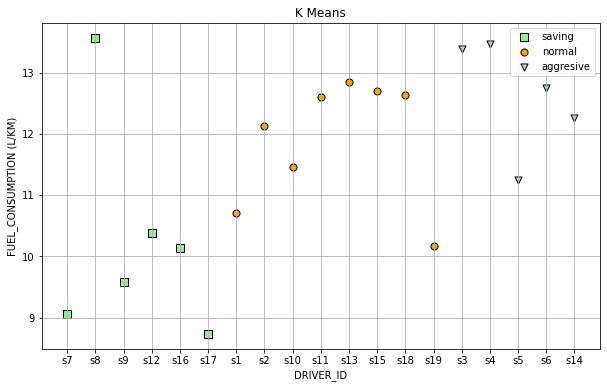

In [156]:
plot_clusters_kmeans_trip(trip_data)

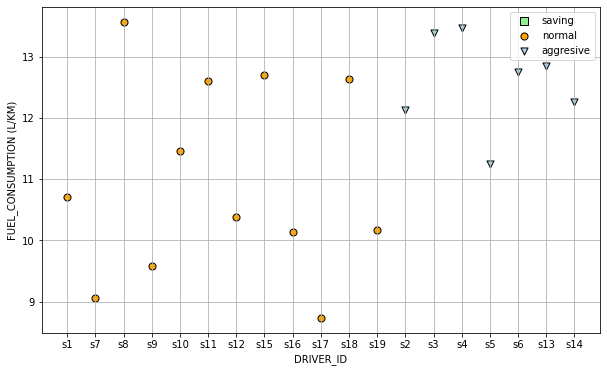

In [157]:
show_default_style_trip(trip_data)

## Classification visualization

Text(0, 0.45, 'IDEAL_RANGE')

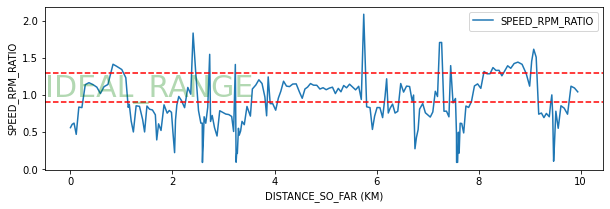

In [158]:
fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(10)


# s4.plot('DISTANCE_SO_FAR', 'MODIFIED_SPEED', ax = ax)
# s4.plot('DISTANCE_SO_FAR', 'MODIFIED_RPM', ax = ax)
s4.plot('DISTANCE_SO_FAR', 'SPEED_RPM_RATIO', ax = ax)
# s4.plot('DISTANCE_SO_FAR', 'MODIFIED_THROTTLE_RATE', ax = ax)
ax.axhline(y = 1.3, color='r', linestyle='--')
ax.axhline(y = 0.9, color='r', linestyle='--')

plt.legend(["SPEED_RPM_RATIO"])
plt.xlabel('DISTANCE_SO_FAR (KM)')
plt.ylabel('SPEED_RPM_RATIO')
plt.text(0,0.45,'IDEAL_RANGE',transform=ax.transAxes, size=30, alpha=0.3, color = 'green')

C:\Users\night\AppData\Local\Temp/ipykernel_16596/609689040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['IS_IDEAL_SPEED_RPM_RATIO'] = 0
c:\Users\night\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


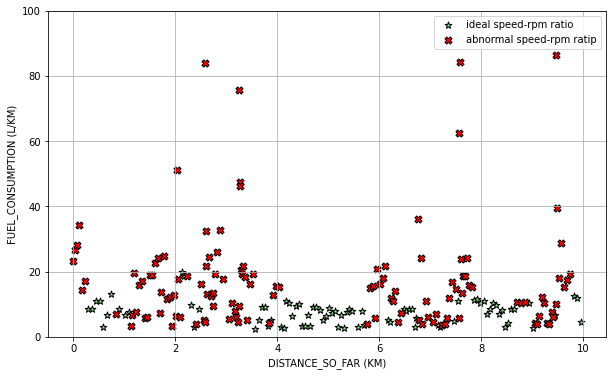

In [159]:
for car in car_list:
    car['IS_IDEAL_SPEED_RPM_RATIO'] = 0
    car['IS_IDEAL_SPEED_RPM_RATIO'].loc[(car['SPEED_RPM_RATIO'] > 0.9) & (car['SPEED_RPM_RATIO'] < 1.4)] = 1

good = s4.loc[s4['IS_IDEAL_SPEED_RPM_RATIO'] == 1]
bad = s4.loc[s4['IS_IDEAL_SPEED_RPM_RATIO'] == 0]

plt.figure(figsize=(10,6))
plt.xlabel('DISTANCE_SO_FAR (KM)')
plt.ylabel('FUEL_CONSUMPTION (L/KM)')
plt.scatter(
    good['DISTANCE_SO_FAR'], good['FUEL_CONSUMPTION'],
    s=50, c='lightgreen',
    marker='*', edgecolor='black',
    label='ideal speed-rpm ratio'
)

plt.scatter(
    bad['DISTANCE_SO_FAR'], bad['FUEL_CONSUMPTION'],
    s=50, c='red',
    marker='X', edgecolor='black',
    label='abnormal speed-rpm ratio'
)

# plt.scatter(
#     label2['DISTANCE_SO_FAR'], label2['FUEL_CONSUMPTION'],
#     s=50, c='lightblue',
#     marker='v', edgecolor='black',
#     label='aggresive'
# )
plt.ylim([0,100])
plt.legend(scatterpoints=1)
plt.grid()

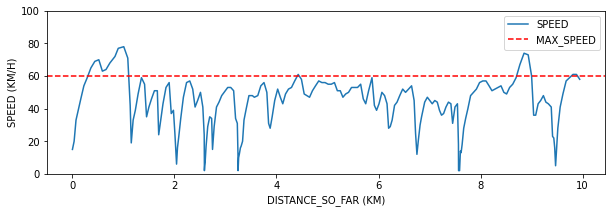

In [160]:
fig, ax = plt.subplots()
s4.plot(x='DISTANCE_SO_FAR', y='SPEED', figsize=(10,3), ax=ax)
ax.set_ylim([0,100])
ax.axhline(y = 60, color='r', linestyle='--')
plt.xlabel('DISTANCE_SO_FAR (KM)')
plt.ylabel('SPEED (KM/H)')
plt.legend(['SPEED', 'MAX_SPEED'])

C:\Users\night\AppData\Local\Temp/ipykernel_16596/1822085445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['SPEED_RANK'] = 0


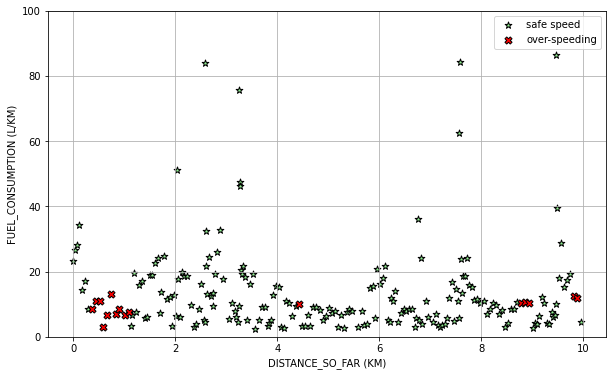

In [174]:
for car in car_list:
    car['SPEED_RANK'] = 0
    car['SPEED_RANK'].loc[(car['SPEED'] > 60)] = 1

bad = s4.loc[s4['SPEED_RANK'] == 1]
good = s4.loc[s4['SPEED_RANK'] == 0]

plt.figure(figsize=(10,6))
plt.xlabel('DISTANCE_SO_FAR (KM)')
plt.ylabel('FUEL_CONSUMPTION (L/KM)')
plt.scatter(
    good['DISTANCE_SO_FAR'], good['FUEL_CONSUMPTION'],
    s=50, c='lightgreen',
    marker='*', edgecolor='black',
    label='safe speed'
)

plt.scatter(
    bad['DISTANCE_SO_FAR'], bad['FUEL_CONSUMPTION'],
    s=50, c='red',
    marker='X', edgecolor='black',
    label='over-speeding'
)

# plt.scatter(
#     label2['DISTANCE_SO_FAR'], label2['FUEL_CONSUMPTION'],
#     s=50, c='lightblue',
#     marker='v', edgecolor='black',
#     label='aggresive'
# )
plt.ylim([0,100])
plt.legend(scatterpoints=1)
plt.grid()

Text(0, 0.85, 'AGGRESSIVE')

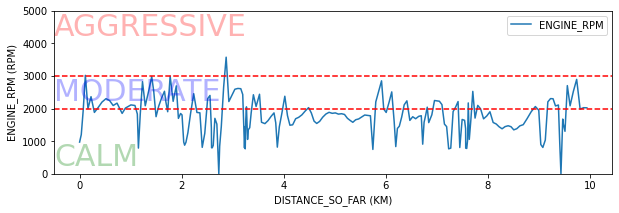

In [161]:
fig, ax = plt.subplots()
s4.plot(x='DISTANCE_SO_FAR', y='ENGINE_RPM', figsize=(10,3), ax=ax)
ax.set_ylim([0,5000])
ax.axhline(y = 2000, color='r', linestyle='--')
ax.axhline(y = 3000, color='r', linestyle='--')
plt.xlabel('DISTANCE_SO_FAR (KM)')
plt.ylabel('ENGINE_RPM (RPM)')
plt.legend(['ENGINE_RPM'])
plt.text(0,0.05,'CALM',transform=ax.transAxes, size=30, alpha=0.3, color = 'green')
plt.text(0,0.45,'MODERATE',transform=ax.transAxes, size=30, alpha=0.3, color = 'blue')
plt.text(0,0.85,'AGGRESSIVE',transform=ax.transAxes, size=30, alpha=0.3, color = 'red')

C:\Users\night\AppData\Local\Temp/ipykernel_16596/3298062090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['RPM_RANK'] = 0
c:\Users\night\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


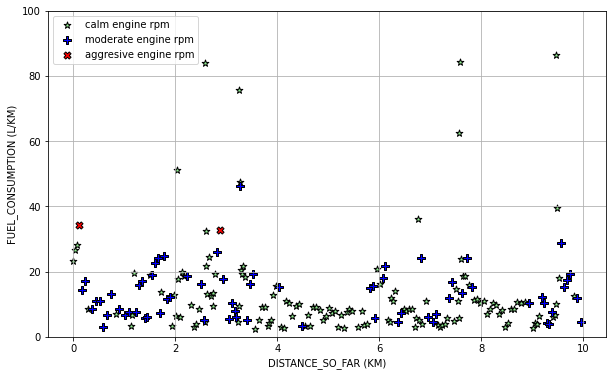

In [162]:
for car in car_list:
    car['RPM_RANK'] = 0
    car['RPM_RANK'].loc[(car['ENGINE_RPM'] > 2000) & (car['ENGINE_RPM'] <= 2999)] = 1
    car['RPM_RANK'].loc[car['ENGINE_RPM'] > 3000] = 2

aggresive = s4.loc[s4['RPM_RANK'] == 2]
normal = s4.loc[s4['RPM_RANK'] == 1]
calm = s4.loc[s4['RPM_RANK'] == 0]

plt.figure(figsize=(10,6))
plt.xlabel('DISTANCE_SO_FAR (KM)')
plt.ylabel('FUEL_CONSUMPTION (L/KM)')
plt.scatter(
    calm['DISTANCE_SO_FAR'], calm['FUEL_CONSUMPTION'],
    s=50, c='lightgreen',
    marker='*', edgecolor='black',
    label='calm engine rpm'
)

plt.scatter(
    normal['DISTANCE_SO_FAR'], normal['FUEL_CONSUMPTION'],
    s=50, c='blue',
    marker='P', edgecolor='black',
    label='moderate engine rpm'
)

plt.scatter(
    aggresive['DISTANCE_SO_FAR'], aggresive['FUEL_CONSUMPTION'],
    s=50, c='red',
    marker='X', edgecolor='black',
    label='aggresive engine rpm'
)
plt.ylim([0,100])
plt.legend(scatterpoints=1)
plt.grid()

Text(0, 0.85, 'AGGRESSIVE')

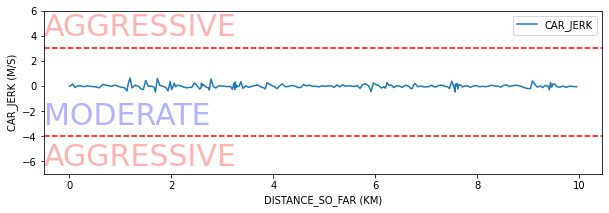

In [163]:
fig, ax = plt.subplots()
s4.plot(x='DISTANCE_SO_FAR', y='CAR_JERK', figsize=(10,3), ax=ax)
ax.set_ylim([-7,6])
ax.axhline(y = 3, color='r', linestyle='--')
ax.axhline(y = -4, color='r', linestyle='--')
plt.xlabel('DISTANCE_SO_FAR (KM)')
plt.ylabel('CAR_JERK (M/S)')
plt.text(0,0.05,'AGGRESSIVE',transform=ax.transAxes, size=30, alpha=0.3, color = 'red')
plt.text(0,0.3,'MODERATE',transform=ax.transAxes, size=30, alpha=0.3, color = 'blue')
plt.text(0,0.85,'AGGRESSIVE',transform=ax.transAxes, size=30, alpha=0.3, color = 'red')

Text(0, 0.85, 'AGGRESSIVE')

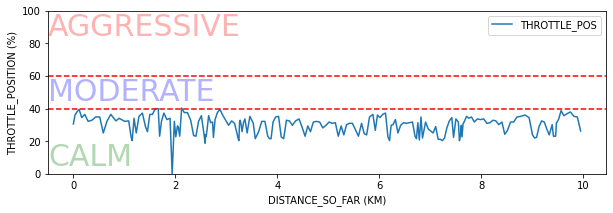

In [164]:
fig, ax = plt.subplots()
s4.plot(x='DISTANCE_SO_FAR', y='THROTTLE_POS', figsize=(10,3), ax=ax)
ax.set_ylim([0,100])
ax.axhline(y = 40, color='r', linestyle='--')
ax.axhline(y = 60, color='r', linestyle='--')
plt.xlabel('DISTANCE_SO_FAR (KM)')
plt.ylabel('THROTTLE_POSITION (%)')
plt.text(0,0.05,'CALM',transform=ax.transAxes, size=30, alpha=0.3, color = 'green')
plt.text(0,0.45,'MODERATE',transform=ax.transAxes, size=30, alpha=0.3, color = 'blue')
plt.text(0,0.85,'AGGRESSIVE',transform=ax.transAxes, size=30, alpha=0.3, color = 'red')

Text(0, 0.85, 'AGGRESSIVE')

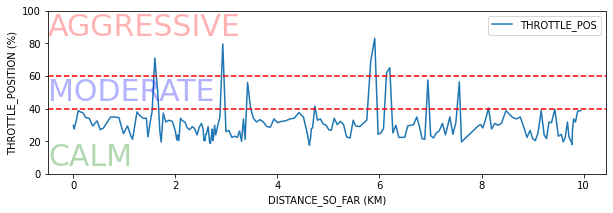

In [165]:
fig, ax = plt.subplots()
s14.plot(x='DISTANCE_SO_FAR', y='THROTTLE_POS', figsize=(10,3), ax=ax)
ax.set_ylim([0,100])
ax.axhline(y = 40, color='r', linestyle='--')
ax.axhline(y = 60, color='r', linestyle='--')
plt.xlabel('DISTANCE_SO_FAR (KM)')
plt.ylabel('THROTTLE_POSITION (%)')
plt.text(0,0.05,'CALM',transform=ax.transAxes, size=30, alpha=0.3, color = 'green')
plt.text(0,0.45,'MODERATE',transform=ax.transAxes, size=30, alpha=0.3, color = 'blue')
plt.text(0,0.85,'AGGRESSIVE',transform=ax.transAxes, size=30, alpha=0.3, color = 'red')

C:\Users\night\AppData\Local\Temp/ipykernel_16596/1528574873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['THROTTLE_RANK'] = 0


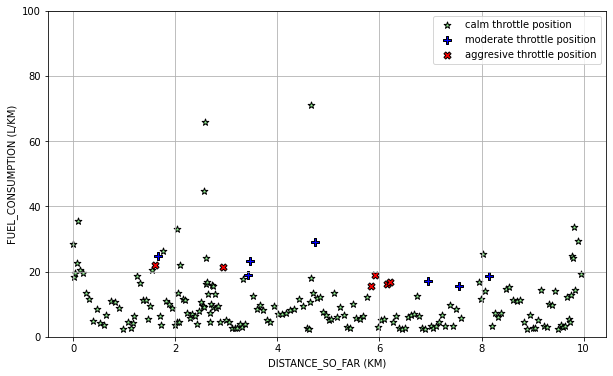

In [169]:
for car in car_list:
    car['THROTTLE_RANK'] = 0
    car['THROTTLE_RANK'].loc[(car['THROTTLE_POS'] > 40) & (car['THROTTLE_POS'] < 60)] = 1
    car['THROTTLE_RANK'].loc[car['THROTTLE_POS'] >= 60] = 2

aggresive = s14.loc[s14['THROTTLE_RANK'] == 2]
normal = s14.loc[s14['THROTTLE_RANK'] == 1]
calm = s14.loc[s14['THROTTLE_RANK'] == 0]

plt.figure(figsize=(10,6))
plt.xlabel('DISTANCE_SO_FAR (KM)')
plt.ylabel('FUEL_CONSUMPTION (L/KM)')
plt.scatter(
    calm['DISTANCE_SO_FAR'], calm['FUEL_CONSUMPTION'],
    s=50, c='lightgreen',
    marker='*', edgecolor='black',
    label='calm throttle position'
)

plt.scatter(
    normal['DISTANCE_SO_FAR'], normal['FUEL_CONSUMPTION'],
    s=50, c='blue',
    marker='P', edgecolor='black',
    label='moderate throttle position'
)

plt.scatter(
    aggresive['DISTANCE_SO_FAR'], aggresive['FUEL_CONSUMPTION'],
    s=50, c='red',
    marker='X', edgecolor='black',
    label='aggresive throttle position'
)
plt.ylim([0,100])
plt.legend(scatterpoints=1)
plt.grid()

C:\Users\night\AppData\Local\Temp/ipykernel_16596/1069758342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['ECO_SCORE_RANK'] = 0
c:\Users\night\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


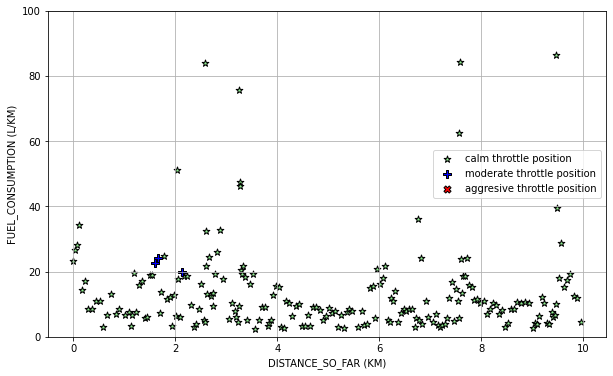

In [171]:
for car in car_list:
    car['ECO_SCORE_RANK'] = 0
    car['ECO_SCORE_RANK'].loc[(car['THROTTLE_POS'] >= 40) & (car['THROTTLE_POS'] < 60)] = 1
    car['ECO_SCORE_RANK'].loc[car['THROTTLE_POS'] >= 60] = 2

aggresive = s4.loc[s4['ECO_SCORE_RANK'] == 2]
normal = s4.loc[s4['ECO_SCORE_RANK'] == 1]
calm = s4.loc[s4['ECO_SCORE_RANK'] == 0]

plt.figure(figsize=(10,6))
plt.xlabel('DISTANCE_SO_FAR (KM)')
plt.ylabel('FUEL_CONSUMPTION (L/KM)')
plt.scatter(
    calm['DISTANCE_SO_FAR'], calm['FUEL_CONSUMPTION'],
    s=50, c='lightgreen',
    marker='*', edgecolor='black',
    label='calm throttle position'
)

plt.scatter(
    normal['DISTANCE_SO_FAR'], normal['FUEL_CONSUMPTION'],
    s=50, c='blue',
    marker='P', edgecolor='black',
    label='moderate throttle position'
)

plt.scatter(
    aggresive['DISTANCE_SO_FAR'], aggresive['FUEL_CONSUMPTION'],
    s=50, c='red',
    marker='X', edgecolor='black',
    label='aggresive throttle position'
)
plt.ylim([0,100])
plt.legend(scatterpoints=1)
plt.grid()

## Instantaneous log

In [ ]:
MAX_SPEED = 60 #km/h


def get_instant_feedback(car_id, index) :
    instance = car_id.loc[car_id.index[index]]

    if instance['ENGINE_RPM'] < 2000:
        print('Your engine RPM is good')
    elif instance['ENGINE_RPM'] > 2000 and instance['ENGINE_RPM'] < 2999:
        print('Stay less than 3000 RPM to save fuel')
    else:
        print('Slow down or shift up a gear to save fuel')

    if instance['CAR_JERK'] <= 3 and instance['CAR_JERK'] >= -4:
        print('Your acceleration and deceleration are good')
    elif instance['CAR_JERK'] > 3:
        print('Avoid forced acceleration')
    else:
        print('Avoid sharp decelera-tion')

    if instance['THROTTLE_POS'] <= 39:
        print('Your throttle performance is good')
    elif instance['THROTTLE_POS'] >= 40 and instance['THROTTLE_POS'] <= 59:
        print('Press the accelerator pedal gently for saving fuel')
    else:
        print('Release the accelerator pedal gradually, too much fuel is supplied to the engine')

    if instance['SPEED'] <= MAX_SPEED:
        print('Your speed is safe')
    elif instance['SPEED'] == MAX_SPEED:
        print('Be careful, reaching the legal speed limit')
    else:
        print('Over-speeding, slow down for safety and fuel saving ')

    if instance['SPEED_RPM_RATIO'] <= 1.3 and instance['SPEED_RPM_RATIO'] >= 0.9:
        print('Keep the current gear for Eco-driving')
    else:
        print('Abnormal Speed-RPM ratio detected, try shifting a gear to save fuel')

    features = ['FUEL_CONSUMPTION', 'MAF',  'SPEED', 'FUEL_RATE', 'ENGINE_LOAD', 'ENGINE_RPM', 'THROTTLE_POS', 'INTAKE_MANIFOLD_PRESSURE',
                'ACCELERATION', 'CAR_JERK', 'MODIFIED_RPM', 'MODIFIED_SPEED', 'SPEED_RPM_RATIO', 
                'FUEL_EFFICIENCY', 'THROTTLE_EFFICIENCY', 'ECO_DRIVING_SCORE',
                'RELATIVE_THROTTLE_SCORE', 'RELATIVE_FUEL_EFFICIENCY_SCORE', 'RELATIVE_ECO_DRIVING_SCORE']

    norm = MinMaxScaler().fit(car_id[features])
    X = norm.transform(car_id[features])
    km = KMeans(n_clusters=3, random_state=42)
    y_km = km.fit_predict(X)

    mean_list = [(car_id[y_km == 0]['FUEL_CONSUMPTION'].values.mean(), 0),
        (car_id[y_km == 1]['FUEL_CONSUMPTION'].values.mean(), 1),
        (car_id[y_km == 2]['FUEL_CONSUMPTION'].values.mean(), 2)]

    saving = min(mean_list)[1]
    mean_list.remove(min(mean_list))
    normal = min(mean_list)[1]

    if y_km[index - 1] == saving:
        print('Your current driving style is Eco-friendly')
    elif y_km[index - 1] == normal:
        print('Your current driving style is normal')
    else:
        print('Your current driving style have space for improvements, try following other driving performance feedback to progress')


In [ ]:
get_instant_feedback(s4, 42)

Stay less than 3000 RPM to save fuel
Your acceleration and deceleration are good
Your throttle performance is good
Your speed is safe
Abnormal Speed-RPM ratio detected, try shifting a gear to save fuel
Your current driving style is normal


<AxesSubplot:>

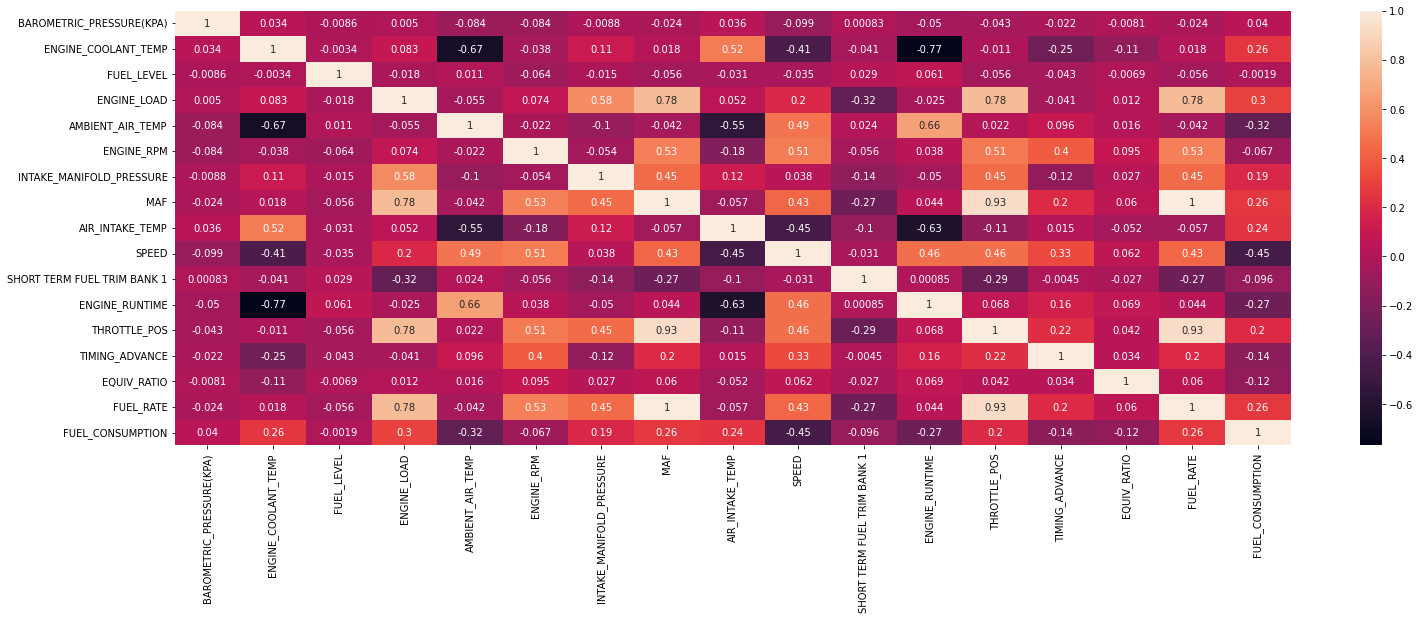

In [ ]:
plt.figure(figsize = (25,8))
sns.heatmap(s5.iloc[:,:18].corr(),annot=True)

## Accumulated log

In [177]:
def get_accumulated_feedback(car_id, index) :
    instance = trip_data.loc[trip_data['VEHICLE_ID'] == car_id].squeeze()
    
    if instance['ENGINE_RPM'] < 2000:
        print('Your average RPM performance is good')
    elif instance['ENGINE_RPM'] > 2000 and instance['ENGINE_RPM'] < 2999:
        print('Your average RPM performance has space for improvements, try staying less than 3000 RPM to save fuel')
    else:
        print('Your average RPM performance has space for improvements, try slowing down your speed or shift up a gear to save fuel')

    if instance['CAR_JERK'] <= 3 and instance['CAR_JERK'] >= -4:
        print('Your average acceleration and deceleration are good')
    elif instance['CAR_JERK'] > 3:
        print('Your average acceleration is aggressive, try avoiding forced acceleration')
    else:
        print('Aggressive driver & Avoid sharp deceleration & Your average deceleration is aggressive, try avoiding sharp deceleration')

    if instance['THROTTLE_POS'] <= 39:
        print('Your average throttle performance is good')
    elif instance['THROTTLE_POS'] >= 40 and instance['THROTTLE_POS'] <= 59:
        print('Your average throttle performance has place for improvements, try pressing the accelerator pedal gently for saving fuel')
    else:
        print('Your average throttle performance is aggressive, too much fuel is supplied to the engine. Try reducing the level of accelerator pedal pressed for saving fuel')

    if instance['SPEED'] <= MAX_SPEED:
        print('Your average speed is good')
    elif instance['SPEED'] == MAX_SPEED:
        print('Your average speed is close to the speed limit, be careful')
    else:
        print('Your average speed is exceeding the speed limit, slow down for safety and fuel saving')

    if instance['SPEED_RPM_RATIO'] <= 1.3 and instance['SPEED_RPM_RATIO'] >= 0.9:
        print('Your average gear shifting is good')
    else:
        print('Your average gear shifting has space for improvements, try shifting a gear when abnormal Speed-RPM ratios are detected')

    if instance['STYLE'] == 0:
        print('Your average driving style based on fuel efficiency and throttle efficiency is Eco-friendly')
    elif instance['STYLE'] == 1:
        print('Your average driving style based on fuel efficiency and throttle efficiency is normal')
    else:
        print('Your average driving style based on fuel efficiency and throttle efficiency has space for improvements')

    features = ['FUEL_CONSUMPTION', 'MAF',  'SPEED', 'FUEL_RATE', 'ENGINE_LOAD', 'ENGINE_RPM', 'THROTTLE_POS', 'INTAKE_MANIFOLD_PRESSURE',
                'ACCELERATION', 'CAR_JERK', 'MODIFIED_RPM', 'MODIFIED_SPEED', 'SPEED_RPM_RATIO', 
                'FUEL_EFFICIENCY', 'THROTTLE_EFFICIENCY', 'ECO_DRIVING_SCORE',
                'RELATIVE_THROTTLE_SCORE', 'RELATIVE_FUEL_EFFICIENCY_SCORE', 'RELATIVE_ECO_DRIVING_SCORE']

    norm = MinMaxScaler().fit(trip_data[features])
    X = norm.transform(trip_data[features])
    km = KMeans(n_clusters=3, random_state=42)
    y_km = km.fit_predict(X)

    mean_list = [(trip_data[y_km == 0]['FUEL_CONSUMPTION'].values.mean(), 0),
        (trip_data[y_km == 1]['FUEL_CONSUMPTION'].values.mean(), 1),
        (trip_data[y_km == 2]['FUEL_CONSUMPTION'].values.mean(), 2)]

    saving = min(mean_list)[1]
    mean_list.remove(min(mean_list))
    normal = min(mean_list)[1]

    if y_km[index - 1] == saving:
        print('Your average driving style based on comprehensive analysis is Eco-friendly')
    elif y_km[index - 1] == normal:
        print('Your average driving style based on comprehensive analysis is normal')
    else:
        print('Your average driving style based on comprehensive analysishas space for improvements, try following other driving performance feedback to progress')
        
    show_cost_performance(s4)

In [178]:
get_accumulated_feedback('s4', 4)

Your average RPM performance is good
Your average acceleration and deceleration are good
Your average throttle performance is good
Your average speed is good
Your average gear shifting has space for improvements, try shifting a gear when abnormal Speed-RPM ratios are detected
Your average driving style based on fuel efficiency and throttle efficiency has space for improvements
Your average driving style based on comprehensive analysishas space for improvements, try following other driving performance feedback to progress
Your trip cost is 2.39 Euros
The best trip cost is 2.07 Euros
Your trip spent 0.32 more Euros than the best saver
